In [9]:
# libraries for Data Manipulation
import pandas as pd
import numpy as np

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [8]:
# !conda install -c conda-forge catboost -y
# !conda install -c conda-forge xgboost -y




Solving environment: done

## Package Plan ##

  environment location: /Users/R1303-M-3Stud/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-1.7.4           |   cpu_h0c1cf5f_0         1.5 MB  conda-forge
    py-xgboost-1.7.4           |cpu_py311hfac9faf_0         283 KB  conda-forge
    xgboost-1.7.4              |cpu_py311h27328e2_0          14 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/osx-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         conda-forge/osx-64::libxgboost-1.7.4-cpu_h0c1cf5f_0 
  py-xgboost         conda-forge/osx-64::py-xgboost-1.7.4-cpu_py311hfac9fa

In [10]:
df = pd.read_csv('data/cleaned_data_science_jobs.csv')

In [12]:

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
# Printing the total number of rows (values) and columns (features) in the dataframe
print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')
print('*************************************')

# Separating categorical and numerical columns using select_dtypes() method
# 'object' data type is generally used for categorical columns
cat = df.select_dtypes(include = ['object'])
# Excluding 'object' data type to get numerical columns
num = df.select_dtypes(exclude = ['object'])

# Printing the number of categorical columns and their names
print(f'There are {len(cat.columns)} Categorical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(cat.columns, 1):
    print(f'{i}. {col_name}')
print('\n***************************************\n')

# Printing the number of numerical columns and their names
print(f'There are {len(num.columns)} Numerical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(num.columns, 1):
    print(f'{i}. {col_name}')


There are 565 rows or values.
There are 10 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 3 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd
3. salary_in_k_usd


In [14]:
num

,work_year,salary_in_usd,salary_in_k_usd
0,2020,79833,79.833
1,2020,260000,260.000
2,2020,109024,109.024
3,2020,20000,20.000
4,2020,150000,150.000
...,...,...,...
560,2022,154000,154.000
561,2022,126000,126.000
562,2022,129000,129.000
563,2022,150000,150.000


In [15]:
cat

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,Intermediate,Full Time,Data Scientist,Germany,On Site,Germany,Large
1,Senior,Full Time,Machine Learning Scientist,Japan,On Site,Japan,Small
2,Senior,Full Time,Data Engineer,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,Intermediate,Full Time,Data Analytics Manager,Honduras,On Site,Honduras,Small
4,Senior,Full Time,Machine Learning Engineer,United States of America,Partially Remote,United States of America,Large
...,...,...,...,...,...,...,...
560,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
561,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
562,Senior,Full Time,Data Analyst,United States of America,On Site,United States of America,Medium
563,Senior,Full Time,Data Analyst,United States of America,Fully Remote,United States of America,Medium


In [42]:
X = df.drop(columns=['salary_in_usd', 'salary_in_k_usd', 'employee_residence', 'remote_ratio'])

In [43]:
X

,work_year,experience_level,employment_type,job_title,company_location,company_size
0,2020,Intermediate,Full Time,Data Scientist,Germany,Large
1,2020,Senior,Full Time,Machine Learning Scientist,Japan,Small
2,2020,Senior,Full Time,Data Engineer,United Kingdom (Great Britain),Medium
3,2020,Intermediate,Full Time,Data Analytics Manager,Honduras,Small
4,2020,Senior,Full Time,Machine Learning Engineer,United States of America,Large
...,...,...,...,...,...,...
560,2022,Senior,Full Time,Data Engineer,United States of America,Medium
561,2022,Senior,Full Time,Data Engineer,United States of America,Medium
562,2022,Senior,Full Time,Data Analyst,United States of America,Medium
563,2022,Senior,Full Time,Data Analyst,United States of America,Medium


In [44]:
y = df['salary_in_usd']

In [45]:
y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
560    154000
561    126000
562    129000
563    150000
564    200000
Name: salary_in_usd, Length: 565, dtype: int64

Create column transformers

In [46]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [47]:
X = preprocessor.fit_transform(X)

In [48]:
X.shape

(565, 76)

Split df into train and test

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [50]:
X_train.shape, X_test.shape

((452, 76), (113, 76))

In [51]:
y_train.shape, y_test.shape

((452,), (113,))

Evaluation function

In [52]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted),
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Models

In [53]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training set')
    print("- Root Mean Squared Error: {: .4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {: .4f}".format(model_train_mae))
    print("- R2 Score {: .4f}".format(model_train_r2))

    print('-----------------------------------------------------------------')

    print('Model performance for test set')
    print("- Root Mean Squared Error: {: .4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {: .4f}".format(model_test_mae))
    print("- R2 Score {: .4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model performance for training set
- Root Mean Squared Error:  51906.6845
- Mean Absolute Error:  32903.5064
- R2 Score  0.5202
-----------------------------------------------------------------
Model performance for test set
- Root Mean Squared Error:  39370.8332
- Mean Absolute Error:  29339.7465
- R2 Score  0.5403


Lasso
Model performance for training set
- Root Mean Squared Error:  51906.8251
- Mean Absolute Error:  32916.8619
- R2 Score  0.5202
-----------------------------------------------------------------
Model performance for test set
- Root Mean Squared Error:  39316.1716
- Mean Absolute Error:  29298.3524
- R2 Score  0.5416


Ridge
Model performance for training set
- Root Mean Squared Error:  52251.3321
- Mean Absolute Error:  33377.0400
- R2 Score  0.5138
-----------------------------------------------------------------
Model performance for test set
- Root Mean Squared Error:  38892.5391
- Mean Absolute Error:  28888.5654
- R2 Score  0.5514


K-Neighbors

In [54]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.551447
1,Lasso,0.541622
0,LinearRegression,0.540347
7,CatBoosting Regressor,0.483150
6,XGBRegressor,0.429713
5,Random Forest Regressor,0.409324
3,K-Neighbors Regressor,0.241123
4,Decision Tree,-0.009227
8,AdaBoost Regressor,-0.187669


In [61]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of Model is %.2f" %score)

Accuracy of Model is 55.14


Text(0, 0.5, 'Predicted')

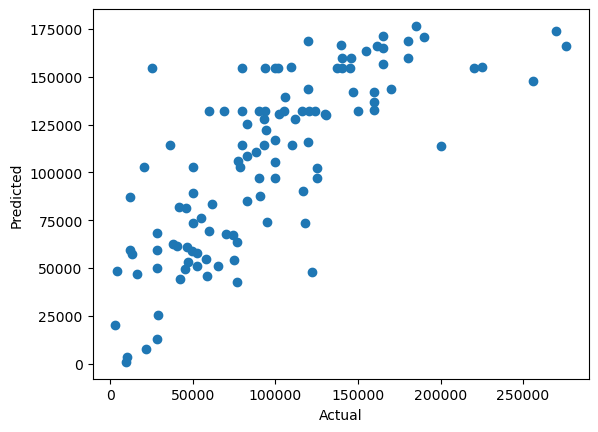

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='salary_in_usd'>

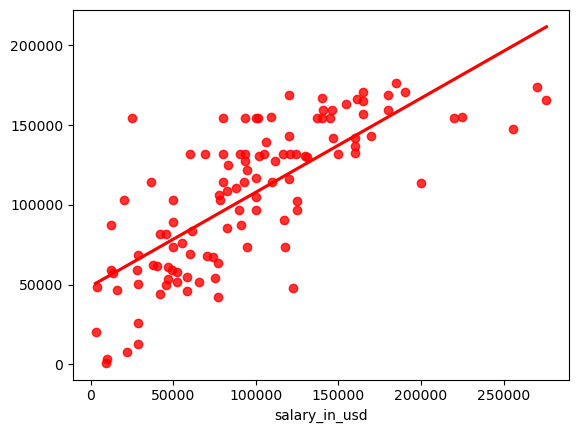

In [63]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [64]:
pred_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted salary': y_pred, 'Difference': y_test-y_pred})
pred_df


,Actual Salary,Predicted salary,Difference
35,74130,67270.326840,6859.673160
114,45391,49467.030636,-4076.030636
172,60000,69252.494602,-9252.494602
236,46809,53294.256312,-6485.256312
289,120600,131960.894575,-11360.894575
...,...,...,...
252,28399,12776.399414,15622.600586
218,140000,166773.988781,-26773.988781
153,13400,57512.493741,-44112.493741
345,161342,166248.172643,-4906.172643
